# Weight initialization
This material is part of [cs231 Training a Neural Networks, Part 1](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture6.pdf)

## Q: What happens when W = 0 init is used?
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/1000px-Artificial_neural_network.svg.png" alt="w=0" style="width:500px;"/>

Ans: If all weights are initialized to 0. In this case, **each hidden unit will get exactly zero activation**. If every neuron in the network computes the same output, then they will also all compute the same gradients during backpropagation and undergo the exact same parameter updates. In other word, there is no source of asymmetry between neurons if their weights are initialized to be the same.

## First idea: Small random numbers
(gaussian with zero mean and 1e-2 standard deviation)

$W=0.01*np.random.randn(D, H)$

It is common to initialize the weights of the neurons to small numbers and refer to doing so as *symmetry breaking*. The idea is that the neurons are all random and unique in the beginning, so they will compute distinct updates and integrate themeselves as diverse parts of the full network.

<span style="color:red">Works ~okay for small networks, but problems with deep neural network.</span>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Let's look at some activation statistics


<span style="color:blue">E.g. 10-layer net with 500000 neurons on each layer, using tanh non-linearities, and initializing as described in last cell.</span>

In [11]:
def init_weight_plot(init_func, act_name):
    # assume some unit Guassian 10-D input data
    D = np.random.randn(1000, 500)
    hidden_layer_sizes = [500] * 10
    nonlinearities = [act_name] * len(hidden_layer_sizes)

    act = {'relu' : lambda x : np.maximum(0, x), 'tanh' : lambda x : np.tanh(x)}
    Hs = {}
    for i in range(len(hidden_layer_sizes)):
        X = D if i == 0 else Hs[i - 1] # input at this layer
        fan_in = X.shape[1]
        fan_out = hidden_layer_sizes[i]
        W = init_func(fan_in, fan_out)

        H = np.dot(X, W) # matrix multiply
        H = act[nonlinearities[i]](H) # nonlinearity
        Hs[i] = H

    # look at distributions at each layer
    print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
    layer_means = [np.mean(H) for i, H in Hs.iteritems()]
    layer_stds = [np.std(H) for i, H in Hs.iteritems()]
    for i, H in Hs.iteritems():
        print('hidden layer %d had mean %f and std %f' % (i + 1, layer_means[i], layer_stds[i]))

    # plot the means and standard devations
    plt.figure()
    plt.subplot(121)
    plt.plot(Hs.keys(), layer_means, 'ob-')
    plt.title('layer mean')
    plt.subplot(122)
    plt.plot(Hs.keys(), layer_stds, 'or-')
    plt.title('layer std')

    # plot the raw distributions
    fig, axes = plt.subplots(nrows = 1, ncols = 10, figsize=(15, 5))
    for i, ax in enumerate(axes.flat, start = 1):
        ax.hist(Hs[i - 1].ravel(), 30, range = (-1, 1))

    fig.tight_layout()
    plt.show()

<h2 style="color:red">All activations become zero!</h2>

## Q: think about the backward pass. What do the gradient look like? 

<span style="color:blue">Hint: think about backward pass for a W*X gate.</span>

(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
input layer had mean 0.000129 and std 0.999867
hidden layer 1 had mean 0.000116 and std 0.214037
hidden layer 2 had mean 0.000096 and std 0.047729
hidden layer 3 had mean -0.000005 and std 0.010641
hidden layer 4 had mean 0.000010 and std 0.002379
hidden layer 5 had mean 0.000000 and std 0.000534
hidden layer 6 had mean -0.000000 and std 0.000118
hidden layer 7 had mean 0.000000 and std 0.000026
hidden layer 8 had mean 0.000000 and std 0.000006
hidden layer 9 had mean 0.000000 and std 0.000001
hidden layer 10 had mean 0.000000 and std 0.000000


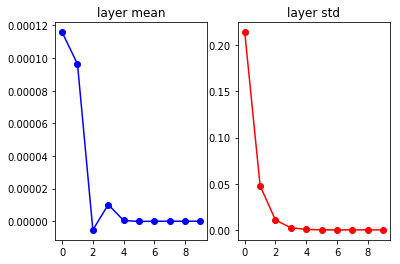

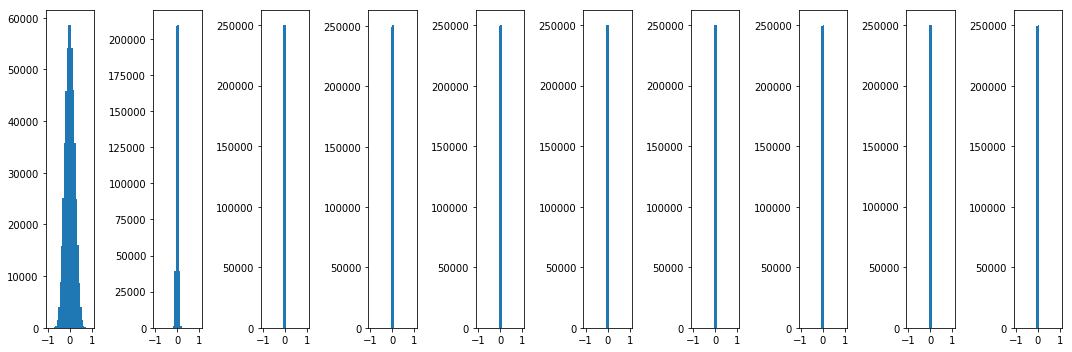

In [9]:
func = lambda x, y: np.random.randn(x, y) * 0.01
init_weight_plot(func, 'tanh')

Ans: A neural network layer that has very small weights will during propagation compute very small gradients on its data (since this gradient is proportional to the value of the weights). This could greatly diminsh the 'gradient signal' flowing backward through a network, and become a concern for deep networks. 

## Larger random numbers

<h2 style='color:red'>Almost all neurons completely saturated, either -1 and 1. Gradients will be all zero.</h2>

input layer had mean -0.000839 and std 0.999638
hidden layer 1 had mean -0.000597 and std 0.981961
hidden layer 2 had mean 0.000304 and std 0.981827
hidden layer 3 had mean 0.001194 and std 0.981769
hidden layer 4 had mean -0.001957 and std 0.981801
hidden layer 5 had mean -0.001155 and std 0.981789
hidden layer 6 had mean 0.000066 and std 0.981531
hidden layer 7 had mean -0.001927 and std 0.981554
hidden layer 8 had mean -0.000562 and std 0.981441
hidden layer 9 had mean -0.001933 and std 0.981684
hidden layer 10 had mean 0.001371 and std 0.981682


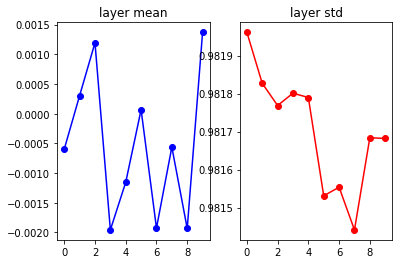

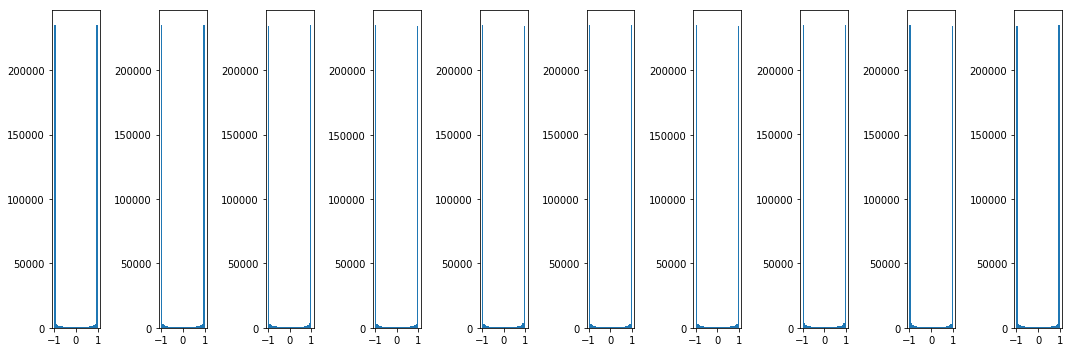

In [4]:
func = lambda x, y: np.random.randn(x, y) * 1.0
init_weight_plot(func, 'tanh')

<h2 style='color:blue'>"Xavier initialization" [Glorot et al., 2010]</h2>

## Reasonable initialization.
## (Mathamatical derivation assumes linear activations)

One problem with the above suggestion is that the distribution of the outputs from a randomly initialized neurons has a variance that grows with the number of inputs. It turns out that we can normalize the variance of each neuron's output to 1 by scaling its weight vector by the square root of its *fan-in* (i.e. its number of inputs). That is, the recommended heuristic is to initialize each neuron's weight vector as the following *func*.

input layer had mean 0.001486 and std 1.000776
hidden layer 1 had mean -0.000560 and std 0.628464
hidden layer 2 had mean -0.000178 and std 0.487752
hidden layer 3 had mean -0.000099 and std 0.409542
hidden layer 4 had mean 0.000350 and std 0.356735
hidden layer 5 had mean -0.000591 and std 0.321640
hidden layer 6 had mean 0.000739 and std 0.295093
hidden layer 7 had mean 0.000099 and std 0.273679
hidden layer 8 had mean -0.000657 and std 0.256167
hidden layer 9 had mean 0.000008 and std 0.241223
hidden layer 10 had mean 0.000991 and std 0.228667


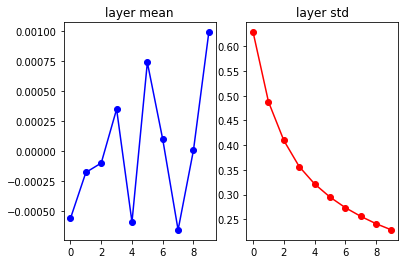

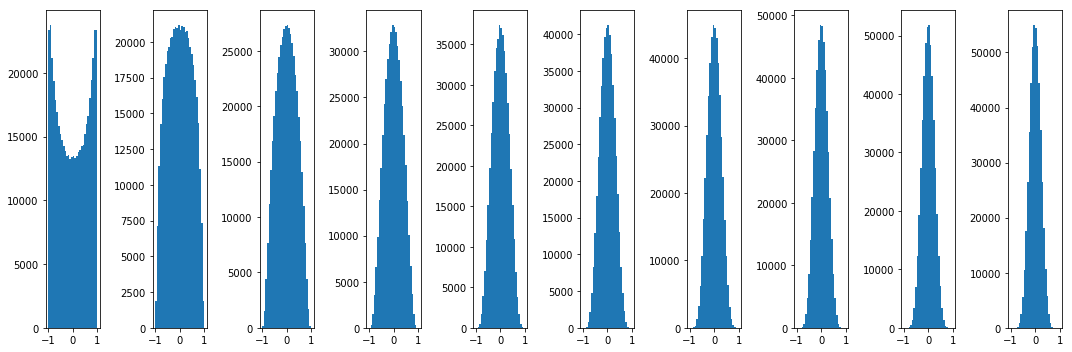

In [5]:
func = lambda x, y: np.random.randn(x, y) / np.sqrt(x)
init_weight_plot(func, 'tanh')

The sketch of the derivation is as follows: Consider the inner product $s=\sum^n_i{w_ix_i}$ between the weights $w$ and input $x$, which gives the raw activation of a neuron before a neuron before the non-linearity. We can examine the variance of $s$.

$Var(s)=Var(\sum^n_i{w_ix_i})\\
\quad\quad=\sum^n_i{Var(w_ix_i)}\\
\quad\quad=\sum^n_i{[E(w_i)]^2Var(x_i)+E[(x_i)]^2Var(w_i)+Var(x_i)Var(w_i)}\\
\quad\quad=\sum^n_i{Var(x_i)Var(w_i)}\\
\quad\quad=(nVar(w))Var(x)$

where in the first 2 steps we have used [properties of variance](https://en.wikipedia.org/wiki/Variance). In third step we assumed zero mean inputs and weights, so $E[x_i]=E[w_i]=0$. Note that this is not generally the case: For example, ReLU units wil have a positive mean. In the last step we assumed that all $w_i$,$x_i$ are identically distributed. From the this derivation we can see that if we want $s$ to have the same variance s all of its inputs $x$, then during initialization we should make sure that the variance of every weight $w$ is $1/n$, where $n$ is the number of its inputs. And since $Var(aX)=a^2Var(X)$ for a random variable $X$ and a scalar $a$, this implies that we should draw unit Gaussian and then scale it by $a=\sqrt{1/n}$, to make its variance $1/n$. This gives the initialization.

<h2 style='color:blue'>but when using ReLU nonlinearty it breaks.</h2>

input layer had mean -0.001411 and std 1.001264
hidden layer 1 had mean 0.398599 and std 0.584515
hidden layer 2 had mean 0.296203 and std 0.418943
hidden layer 3 had mean 0.199291 and std 0.302424
hidden layer 4 had mean 0.152907 and std 0.220926
hidden layer 5 had mean 0.104702 and std 0.158432
hidden layer 6 had mean 0.079835 and std 0.113273
hidden layer 7 had mean 0.056306 and std 0.085303
hidden layer 8 had mean 0.043535 and std 0.063232
hidden layer 9 had mean 0.031576 and std 0.047526
hidden layer 10 had mean 0.021011 and std 0.032891


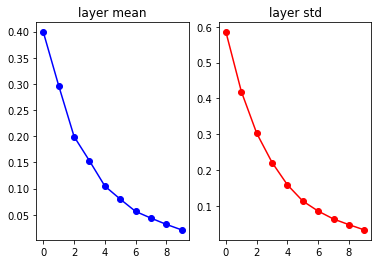

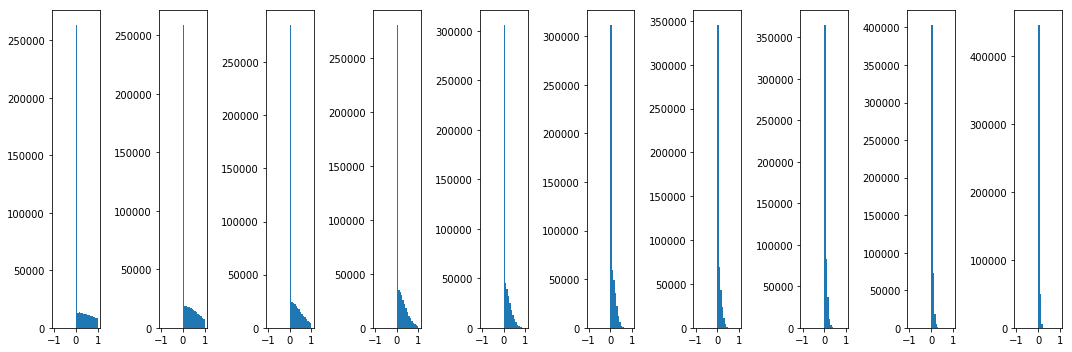

In [6]:
func = lambda x, y: np.random.randn(x, y) / np.sqrt(x)
init_weight_plot(func, 'relu')

<h2 style='color:blue'>He et al., 2015 (note additional / 2)</h2>

input layer had mean -0.001003 and std 0.999842
hidden layer 1 had mean 0.566498 and std 0.828109
hidden layer 2 had mean 0.570983 and std 0.829193
hidden layer 3 had mean 0.581485 and std 0.852360
hidden layer 4 had mean 0.598551 and std 0.889613
hidden layer 5 had mean 0.594093 and std 0.868484
hidden layer 6 had mean 0.662686 and std 0.939426
hidden layer 7 had mean 0.604626 and std 0.937436
hidden layer 8 had mean 0.639056 and std 0.921904
hidden layer 9 had mean 0.587902 and std 0.930376
hidden layer 10 had mean 0.591366 and std 0.874706


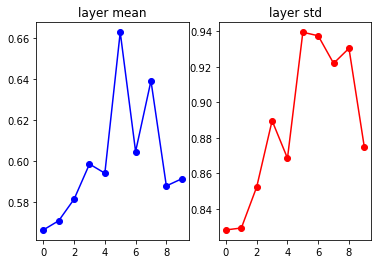

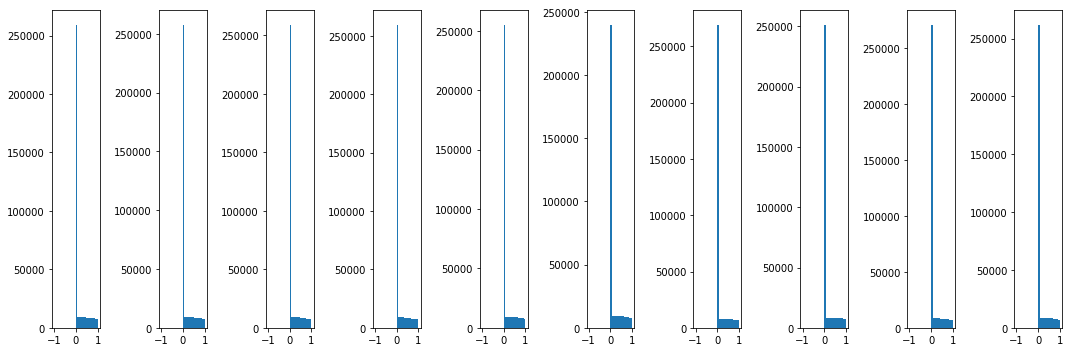

In [7]:
func = lambda x, y: np.random.randn(x, y) / np.sqrt(x / 2)
init_weight_plot(func, 'relu')

# Proper initialization is an active area of research
## Understanding the difficulty of training deep forward neural networks
by Glorot and Bengio, 2010

The authors end up recommending an initialization of the form $Var(w)=2/(n_{in}+n_{out})$ where $n_{in}$, $n_{out}$ are the number of units in the previous layer and the next layer. This is based on a compromose and an equivalent analysis of the packpropagation gradients.
## Exact solutions to the nonlinear dynamics of leaning in deep linear neural network
by Saxe et al., 2013
## Random walk initialization for training very deep feedforward networks
by Sussillo and Abbot, 2014
## Delving deep in rectifiers: Surpressing human-level performance on ImageNet clasification
by He et al., 2015
This paper derives an initialization specifically for ReLU neurons, reaching the conclusion that the variance of neurons in the network should be $2,0/n$.
## Data-dependent initialization of convolutional neural networks
by Krähenbühl et al., 2015
## All you need is a good init
by Mishkin and Matas, 2015